In [1]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [3]:
hello = tf.constant("Hello, Tensorflow!")
sess = tf.Session()

In [4]:
hello

<tf.Tensor 'Const:0' shape=() dtype=string>

In [12]:
from IPython.display import Image 
from tqdm import tqdm_notebook

### Ex01. Multi-variable linear regressio

In [13]:
import tensorflow as tf

tf.set_random_seed(777)

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y  = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b  = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b
print(hypothesis)

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

Tensor("add_2:0", dtype=float32)


In [14]:
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))


Step : 0 
Cost : 8585.2041015625 
Prediction :
[230.84917 285.1581  276.7442  303.636   217.71155]

Step : 1 
Cost : 2693.230712890625 
Prediction :
[194.67107 241.67375 233.89885 256.97836 184.54378]

Step : 2 
Cost : 846.4093017578125 
Prediction :
[174.4165  217.32832 209.91138 230.85648 165.9742 ]

Step : 3 
Cost : 267.52789306640625 
Prediction :
[163.07695 203.69803 196.48174 216.23181 155.57758]

Step : 4 
Cost : 86.07921600341797 
Prediction :
[156.72859 196.0668  188.96307 208.04404 149.75673]

Step : 5 
Cost : 29.204030990600586 
Prediction :
[153.1746  191.79422 184.75372 203.46004 146.49767]

Step : 6 
Cost : 11.375921249389648 
Prediction :
[151.18509 189.40198 182.39711 200.89366 144.67284]

Step : 7 
Cost : 5.787132740020752 
Prediction :
[150.07147 188.0625  181.07784 199.45686 143.65103]

Step : 8 
Cost : 4.034646511077881 
Prediction :
[149.44821 187.31241 180.33926 198.65247 143.07875]

Step : 9 
Cost : 3.4847092628479004 
Prediction :
[149.0995  186.89232 179.92586

### Ex02. Multi-variable matmul linear regression

> $$ w1 x1 + w2 x2 + w3 x3 + ... + wn xn $$
$$ [x{1} x{2} x{3}] \times \begin{bmatrix} w{1}\ w{2}\ w{3} 
\end{bmatrix} [x_1 w_1 + x_2 w_2 + x_3 w_3] $$
$$H(X) = XW$$

In [20]:
tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75.], 
          [93., 88., 93.],
          [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))


Step : 0 
Cost : 13754.142578125 
Prediction :
[[43.244526]
 [62.632473]
 [56.235767]
 [60.108585]
 [51.52855 ]]

Step : 1 
Cost : 4318.98291015625 
Prediction :
[[ 89.02794 ]
 [117.65831 ]
 [110.454926]
 [119.15174 ]
 [ 93.49889 ]]

Step : 2 
Cost : 1361.555419921875 
Prediction :
[[114.66097]
 [148.46489]
 [140.81041]
 [152.20801]
 [116.99605]]

Step : 3 
Cost : 434.5558166503906 
Prediction :
[[129.01251]
 [165.71196]
 [157.80551]
 [170.71512]
 [130.15073]]

Step : 4 
Cost : 143.9869842529297 
Prediction :
[[137.04797]
 [175.36755]
 [167.32059]
 [181.07669]
 [137.51501]]

Step : 5 
Cost : 52.90471267700195 
Prediction :
[[141.5473 ]
 [180.77301]
 [172.64792]
 [186.8779 ]
 [141.63751]]

Step : 6 
Cost : 24.351261138916016 
Prediction :
[[144.06686]
 [183.79893]
 [175.63066]
 [190.12592]
 [143.94502]]

Step : 7 
Cost : 15.397216796875 
Prediction :
[[145.47803]
 [185.49265]
 [177.30077]
 [191.94449]
 [145.23639]]

Step : 8 
Cost : 12.586509704589844 
Prediction :
[[146.26866]
 [186.4

### Ex03. File input linear regression

### Loading Data File

In [21]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

xy = np.loadtxt('./data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print("x_data.shape : {}, \tlen(x_data) : {} \nx_data : \n{}".format(x_data.shape, len(x_data), x_data))
print("-"*25)
print("y_data.shape : {}  \ny_data : \n{}".format(y_data.shape, y_data))

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

x_data.shape : (25, 3), 	len(x_data) : 25 
x_data : 
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
-------------------------
y_data.shape : (25, 1)  
y_data : 
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [22]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))


Step : 0 
Cost : 38.91928482055664 
Prediction :
[[159.03647 ]
 [190.77019 ]
 [188.05075 ]
 [205.023   ]
 [145.42569 ]
 [107.92775 ]
 [154.22163 ]
 [115.300354]
 [178.68732 ]
 [166.24567 ]
 [148.24973 ]
 [146.22989 ]
 [193.93015 ]
 [160.92294 ]
 [154.9333  ]
 [193.88336 ]
 [152.87361 ]
 [185.1226  ]
 [184.90878 ]
 [165.62753 ]
 [180.54524 ]
 [179.34142 ]
 [172.10834 ]
 [159.59805 ]
 [197.5581  ]]

Step : 1 
Cost : 20.385709762573242 
Prediction :
[[157.03767 ]
 [188.36855 ]
 [185.68394 ]
 [202.44579 ]
 [143.59389 ]
 [106.577934]
 [152.2929  ]
 [113.87102 ]
 [176.44347 ]
 [164.16826 ]
 [146.39128 ]
 [144.39789 ]
 [191.48451 ]
 [158.8894  ]
 [152.99583 ]
 [191.44658 ]
 [150.93666 ]
 [182.808   ]
 [182.57706 ]
 [163.54118 ]
 [178.28343 ]
 [177.08868 ]
 [169.9517  ]
 [157.58185 ]
 [195.06877 ]]

Step : 2 
Cost : 13.53172492980957 
Prediction :
[[155.8221 ]
 [186.90825]
 [184.24469]
 [200.87872]
 [142.48003]
 [105.75742]
 [151.12027]
 [113.00222]
 [175.07936]
 [162.90572]
 [145.26134]
 [14

 [190.99162 ]]

Step : 1300 
Cost : 7.443758487701416 
Prediction :
[[153.42905 ]
 [184.7026  ]
 [181.69348 ]
 [198.49748 ]
 [140.63634 ]
 [105.088646]
 [149.73987 ]
 [112.52131 ]
 [173.65855 ]
 [162.52722 ]
 [143.72327 ]
 [142.2156  ]
 [186.96626 ]
 [154.60925 ]
 [150.57532 ]
 [188.04352 ]
 [146.58566 ]
 [179.84024 ]
 [178.1029  ]
 [159.53726 ]
 [175.24484 ]
 [173.99466 ]
 [166.88431 ]
 [153.02133 ]
 [190.97672 ]]

Step : 1400 
Cost : 7.358026504516602 
Prediction :
[[153.40234]
 [184.70404]
 [181.67577]
 [198.50089]
 [140.62698]
 [105.12063]
 [149.76672]
 [112.57425]
 [173.69536]
 [162.61446]
 [143.73581]
 [142.25146]
 [186.9253 ]
 [154.54494]
 [150.6098 ]
 [188.0635 ]
 [146.50723]
 [179.87909]
 [178.05508]
 [159.49493]
 [175.2731 ]
 [174.016  ]
 [166.90193]
 [152.94159]
 [190.96223]]

Step : 1500 
Cost : 7.278961181640625 
Prediction :
[[153.37704 ]
 [184.70514 ]
 [181.65884 ]
 [198.50424 ]
 [140.61763 ]
 [105.150986]
 [149.79279 ]
 [112.62552 ]
 [173.7303  ]
 [162.69778 ]
 [143.747

### prediction

In [24]:
# Ask score
print("Your score \t: \n", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

Your score 	: 
 [[185.65407]]


In [25]:
print("\nOther scores \t: \n", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


Other scores 	: 
 [[175.2043 ]
 [177.47295]]


### Ex04. TF reader linear regression 5
> * 참조 : https://www.tensorflow.org/programmers_guide/reading_data

In [27]:
import tensorflow as tf

tf.set_random_seed(777)


#####

filename_queue = tf.train.string_input_producer(
['./data/data-01-test-score.csv'], shuffle = False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

#####

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

W0911 11:11:48.027195  5428 deprecation.py:323] From <ipython-input-27-a7792e1f6310>:6: string_input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
W0911 11:11:48.036959  5428 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\python\training\input.py:278: input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
W0911 11:11:48.038953  542

In [28]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())


#####

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

#####


Step_val = []
Cost_val = []

for step in tqdm_notebook(range(2001)):

    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    

    Step_val.append(step)
    Cost_val.append(cost_val)
    
    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))

coord.request_stop()
coord.join(threads)

W0911 11:11:54.913328  5428 deprecation.py:323] From <ipython-input-28-a0a2b752713a>:8: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.



Step : 0 
Cost : 25095.505859375 
Prediction :
[[ 10.050995 ]
 [ -1.170818 ]
 [  5.83598  ]
 [  4.515473 ]
 [ -2.690193 ]
 [ -6.4138255]
 [  4.329682 ]
 [  4.9393125]
 [ -6.4385524]
 [-11.244858 ]]

Step : 1 
Cost : 9730.7705078125 
Prediction :
[[54.609245]
 [47.31186 ]
 [76.704704]
 [65.472115]
 [56.91278 ]
 [67.138054]
 [60.472603]
 [72.51369 ]
 [75.44797 ]
 [68.594795]]

Step : 2 
Cost : 4275.7802734375 
Prediction :
[[108.96491 ]
 [102.65108 ]
 [105.52999 ]
 [107.63037 ]
 [117.397285]
 [102.87483 ]
 [110.43588 ]
 [115.78199 ]
 [124.264084]
 [ 82.43084 ]]

Step : 3 
Cost : 1221.67724609375 
Prediction :
[[ 73.45798 ]
 [118.39084 ]
 [ 89.49651 ]
 [126.303734]
 [111.72764 ]
 [112.005775]
 [103.894264]
 [152.22308 ]
 [128.25899 ]
 [116.75539 ]]

Step : 4 
Cost : 603.8897094726562 
Prediction :
[[156.34215]
 [131.32742]
 [157.25002]
 [160.76607]
 [144.93405]
 [150.5473 ]
 [144.0718 ]
 [145.173  ]
 [144.64322]
 [163.14864]]

Step : 5 
Cost : 302.2217712402344 
Prediction :
[[148.58507]

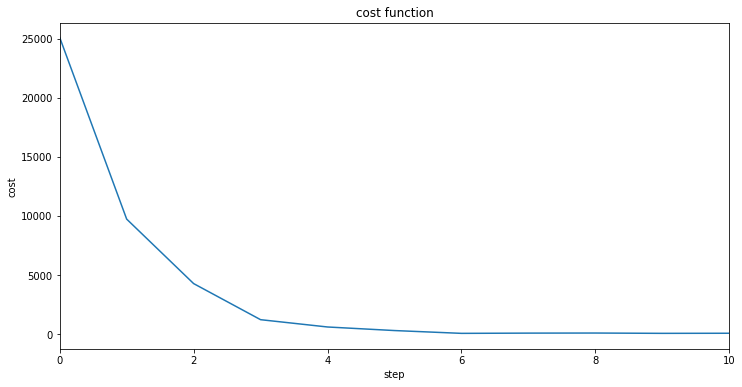

In [33]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]

plt.plot(Step_val, Cost_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('cost')
plt.xlim(0,10)
plt.show()

In [31]:
print("Your score \t: \n", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

Your score 	: 
 [[171.49309]]


In [32]:
# Ask score many
print("\nOther scores \t: \n", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


Other scores 	: 
 [[169.43909]
 [185.52484]]
